In [1]:
import numpy as np
import matplotlib.pyplot as plt
import adaptivealgo.cli.policy_iter as pi
import adaptivealgo.cli.simulate_policy as sim
from adaptivealgo.lib.simulator import Simulator

In [2]:
n_links = 2
f_thresh = 0.3
actions = [0.1, 0.2]
alpha = 1.0
gamma = 0.1
tol = 1e-6

n_episodes = 10_000

In [3]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(f"Policy iteration took {i} iterations")
print(f"Optimal policy: {policy['policy']}")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
samples = sim.gen_policy_samples(simulator, n_episodes)

suboptimal_policy = {key: (1 - value if key == "[]" else value) for key, value in policy["policy"].items()}
simulator = Simulator(suboptimal_policy, n_links, f_thresh, actions, alpha, gamma)
suboptimal_samples = sim.gen_policy_samples(simulator, n_episodes)

print(f"Mean runtime optimal policy: {np.mean(samples)} steps")
print(f"Mean runtime suboptimal policy: {np.mean(suboptimal_samples)} steps")

Policy iteration took 2 iterations
Optimal policy: {'[]': 1, '[1]': 1, '[2]': 1, '[3]': 1, '[4]': 1, '[5]': 1, '[6]': 1, '[7]': 1, '[8]': 1, '[9]': 1, '[10]': 1, '[11]': 1, '[12]': 1, '[13]': 1, '[14]': 1, '[15]': 1, '[16]': 1, '[17]': 1, '[18]': 1, '[19]': 1, '[20]': 1, '[21]': 1, '[22]': 1, '[23]': 1, '[24]': 1, '[25]': 1}
Mean runtime optimal policy: 10.0452 steps
Mean runtime suboptimal policy: 14.9649 steps


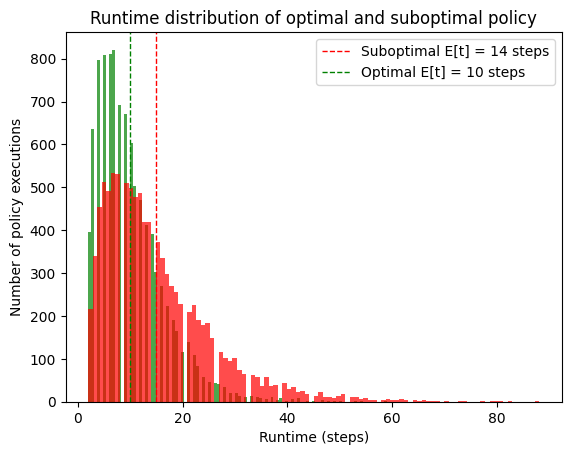

In [4]:
plt.hist(samples, bins=100, color='g', alpha=0.7)
plt.hist(suboptimal_samples, bins=100, color='r', alpha=0.7)

plt.axvline(np.mean(suboptimal_samples), color='r', linestyle='--', linewidth=1)
plt.axvline(np.mean(samples), color='g', linestyle='--', linewidth=1)

plt.title('Runtime distribution of optimal and suboptimal policy')
plt.xlabel('Runtime (steps)')
plt.ylabel('Number of policy executions')

plt.legend([f'Suboptimal E[t] = {int(np.mean(suboptimal_samples))} steps', f'Optimal E[t] = {int(np.mean(samples))} steps'])
plt.show()